## ***CONVULUTION NEURAL NETWORK IMPLEMENTATION WITHOUT FRAMEWORKS***

In [0]:
import numpy as np
import matplotlib.pyplot as plt


**ZEOR PADDING USING NUMPY**

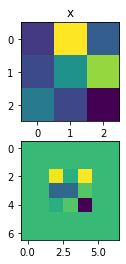

In [31]:
x=np.random.randn(4,3,3,2)
fig, axarr = plt.subplots(2,1)
axarr[0].set_title('x')
axarr[0].imshow(x[3,:,:,0])
def zero_pad(x,pad):
  x_pad=np.pad(x,((0,0),(2,2),(2,2),(0,0)),mode='constant',constant_values=(0,0))
  return x_pad
axarr[1].imshow(x_pad[3,:,:,0])

**CONVOLUTION SINGLE STEP**

In [0]:
def conv_single_step(a_slice_prev,W,b):
  s=np.multiply(a_slice_prev,W)
  Z=np.sum(s)
  Z+=b
  return Z

In [24]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)


Z = [[[-6.99908945]]]


**CONVOLUTION FORWARD PROPAGATION**

In [0]:
def conv_forward(A_prev,W,b,hparameters):
  (m,n_H_prev,n_W_prev,n_C_prev)=A_prev.shape
  (f,f,n_C_prev,n_C)=W.shape
  stride = hparameters['stride']
  pad = hparameters['pad']
  n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
  n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    
    
  Z = np.zeros((m, n_H, n_W, n_C))
    
    
  A_prev_pad = zero_pad(A_prev, pad)
    
  for i in range(m):               
      a_prev_pad = A_prev_pad[i]              
      for h in range(n_H):           
            
          vert_start = h * stride
          vert_end = vert_start + f
          for w in range(n_W):       
                
              horiz_start = w * stride
              horiz_end = horiz_start + f
                
              for c in range(n_C):   
                                        
                   
                  a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    
                    
                  weights = W[...,c]
                  biases =  b[...,c]
                  Z[i, h, w, c] = conv_single_step(a_slice_prev,weights, biases)
                                        
   
  assert(Z.shape == (m, n_H, n_W, n_C))
    
    
  cache = (A_prev, W, b, hparameters)
    
  return Z, cache


In [33]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Z's mean =
 0.24412669714289048
Z[3,2,1] =
 [ 5.33794981 -3.55347427  3.62691454  6.11363101 -5.85480522 -9.80766324
  8.21479629 -4.97798512]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


**POOLING**

In [0]:
def pool_forward(A_prev, hparameters, mode = "max"):
    
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(m):                         
        for h in range(n_H): 
            for w in range(n_W):
                for c in range (n_C): 
                    vert_start = h * stride
                    vert_end = vert_start + f
                    
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                
                           
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    
    cache = (A_prev, hparameters)
    
    
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [35]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[1.74481176 0.90159072 1.65980218]
   [1.74481176 1.46210794 1.65980218]
   [1.74481176 1.6924546  1.65980218]]

  [[1.14472371 0.90159072 2.10025514]
   [1.14472371 0.90159072 1.65980218]
   [1.14472371 1.6924546  1.65980218]]

  [[1.13162939 1.51981682 2.18557541]
   [1.13162939 1.51981682 2.18557541]
   [1.13162939 1.6924546  2.18557541]]]


 [[[1.19891788 0.84616065 0.82797464]
   [0.69803203 0.84616065 1.2245077 ]
   [0.69803203 1.12141771 1.2245077 ]]

  [[1.96710175 0.84616065 1.27375593]
   [1.96710175 0.84616065 1.23616403]
   [1.62765075 1.12141771 1.2245077 ]]

  [[1.96710175 0.86888616 1.27375593]
   [1.96710175 0.86888616 1.23616403]
   [1.62765075 1.12141771 0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[-3.01046719e-02 -3.24021315e-03 -3.36298859e-01]
   [ 1.43310483e-01  1.93146751e-01 -4.44905196e-01]
   [ 1.28934436e-01  2.22428468e-01  1.25067597e-01]]

  [[-3.81801899e-01  1.59993515e-02  1.70562706e-01]
   [